In [1]:
import numpy as np

In [2]:
import pandas as pd

In [12]:
df = pd.read_csv('https://raw.githubusercontent.com/ardhiraka/PFDS_sources/master/property_data.csv')

In [13]:
df

,PID,ST_NUM,ST_NAME,OWN_OCCUPIED,NUM_BEDROOMS,NUM_BATH,SQ_FT
0,100001000.0,104.0,PUTNAM,Y,3,1,1000
1,100002000.0,197.0,LEXINGTON,N,3,1.5,--
2,100003000.0,NaN,LEXINGTON,N,NaN,1,850
3,100004000.0,201.0,BERKELEY,12,1,NaN,700
4,NaN,203.0,BERKELEY,Y,3,2,1600
5,100006000.0,207.0,BERKELEY,Y,NaN,1,800
6,100007000.0,NaN,WASHINGTON,NaN,2,HURLEY,950
7,100008000.0,213.0,TREMONT,Y,--,1,NaN
8,100009000.0,215.0,TREMONT,Y,na,2,1800


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PID           8 non-null      float64
 1   ST_NUM        7 non-null      float64
 2   ST_NAME       9 non-null      object 
 3   OWN_OCCUPIED  8 non-null      object 
 4   NUM_BEDROOMS  7 non-null      object 
 5   NUM_BATH      8 non-null      object 
 6   SQ_FT         8 non-null      object 
dtypes: float64(2), object(5)
memory usage: 632.0+ bytes


In [6]:
df["ST_NUM"]

0    104.0
1    197.0
2      NaN
3    201.0
4    203.0
5    207.0
6      NaN
7    213.0
8    215.0
Name: ST_NUM, dtype: float64

In [7]:
df["ST_NUM"].isnull()

0    False
1    False
2     True
3    False
4    False
5    False
6     True
7    False
8    False
Name: ST_NUM, dtype: bool

In [ ]:
tampilkan missing value nya ada berapa

In [8]:
df["ST_NUM"].isnull().sum()

2

In [9]:
df["ST_NUM"].isna()

0    False
1    False
2     True
3    False
4    False
5    False
6     True
7    False
8    False
Name: ST_NUM, dtype: bool

In [10]:
df["NUM_BEDROOMS"].isna()

0    False
1    False
2     True
3    False
4    False
5     True
6    False
7    False
8    False
Name: NUM_BEDROOMS, dtype: bool

In [ ]:
ganti si null yang true

In [11]:
df.loc[7:, "NUM_BEDROOMS"] = np.nan
df["NUM_BEDROOMS"]

0      3
1      3
2    NaN
3      1
4      3
5    NaN
6      2
7    NaN
8    NaN
Name: NUM_BEDROOMS, dtype: object

In [ ]:
kelemahannya mesti tau index nya berapa, kalo diatas index[7]

In [ ]:
cara kedua : di specify missing values itu ciri2 nya seperti mis NA, ..

In [36]:
df=pd.read_csv("https://raw.githubusercontent.com/ardhiraka/PFDS_sources/master/property_data.csv", na_values=["n/a","na","","--"])
df

,PID,ST_NUM,ST_NAME,OWN_OCCUPIED,NUM_BEDROOMS,NUM_BATH,SQ_FT
0,100001000.0,104.0,PUTNAM,Y,3.0,1,1000.0
1,100002000.0,197.0,LEXINGTON,N,3.0,1.5,NaN
2,100003000.0,NaN,LEXINGTON,N,NaN,1,850.0
3,100004000.0,201.0,BERKELEY,12,1.0,NaN,700.0
4,NaN,203.0,BERKELEY,Y,3.0,2,1600.0
5,100006000.0,207.0,BERKELEY,Y,NaN,1,800.0
6,100007000.0,NaN,WASHINGTON,NaN,2.0,HURLEY,950.0
7,100008000.0,213.0,TREMONT,Y,NaN,1,NaN
8,100009000.0,215.0,TREMONT,Y,NaN,2,1800.0


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PID           8 non-null      float64
 1   ST_NUM        7 non-null      float64
 2   ST_NAME       9 non-null      object 
 3   OWN_OCCUPIED  8 non-null      object 
 4   NUM_BEDROOMS  5 non-null      float64
 5   NUM_BATH      8 non-null      object 
 6   SQ_FT         7 non-null      float64
dtypes: float64(4), object(3)
memory usage: 632.0+ bytes


In [17]:
df["OWN_OCCUPIED"].isna()

0    False
1    False
2    False
3    False
4    False
5    False
6     True
7    False
8    False
Name: OWN_OCCUPIED, dtype: bool

In [18]:
df["OWN_OCCUPIED"].unique()

array(['Y', 'N', '12', nan], dtype=object)

In [20]:
df["OWN_OCCUPIED"].value_counts()

Y     5
N     2
12    1
Name: OWN_OCCUPIED, dtype: int64

In [21]:
df.loc[0, "OWN_OCCUPIED"]

'Y'

In [22]:
for row in df.OWN_OCCUPIED:
    print(row, type(row))

Y <class 'str'>
N <class 'str'>
N <class 'str'>
12 <class 'str'>
Y <class 'str'>
Y <class 'str'>
nan <class 'float'>
Y <class 'str'>
Y <class 'str'>


In [23]:
for row in df.OWN_OCCUPIED:
    print(isinstance(row,str))

True
True
True
True
True
True
False
True
True


In [25]:
for row in df.OWN_OCCUPIED:
    if not isinstance(row,str) :
        continue
    try:
        print(int(row))
        print("tidak error")
    except:
        print(row,"tidak bisa jadi int")

Y tidak bisa jadi int
N tidak bisa jadi int
N tidak bisa jadi int
12
tidak error
Y tidak bisa jadi int
Y tidak bisa jadi int
Y tidak bisa jadi int
Y tidak bisa jadi int


In [27]:
for idx, row in enumerate(df.OWN_OCCUPIED):
    if not isinstance(row,str) :
        continue
    try:
        int(row)
        df.loc[idx, "OWN_OCCUPIED"] = np.nan
    except:
        print(row,"tidak bisa jadi int")
         
df.OWN_OCCUPIED

Y tidak bisa jadi int
N tidak bisa jadi int
N tidak bisa jadi int
Y tidak bisa jadi int
Y tidak bisa jadi int
Y tidak bisa jadi int
Y tidak bisa jadi int


0      Y
1      N
2      N
3    NaN
4      Y
5      Y
6    NaN
7      Y
8      Y
Name: OWN_OCCUPIED, dtype: object

In [28]:
df

,PID,ST_NUM,ST_NAME,OWN_OCCUPIED,NUM_BEDROOMS,NUM_BATH,SQ_FT
0,100001000.0,104.0,PUTNAM,Y,3.0,1,1000.0
1,100002000.0,197.0,LEXINGTON,N,3.0,1.5,NaN
2,100003000.0,NaN,LEXINGTON,N,NaN,1,850.0
3,100004000.0,201.0,BERKELEY,NaN,1.0,NaN,700.0
4,NaN,203.0,BERKELEY,Y,3.0,2,1600.0
5,100006000.0,207.0,BERKELEY,Y,NaN,1,800.0
6,100007000.0,NaN,WASHINGTON,NaN,2.0,HURLEY,950.0
7,100008000.0,213.0,TREMONT,Y,NaN,1,NaN
8,100009000.0,215.0,TREMONT,Y,NaN,2,1800.0


In [37]:
df.NUM_BATH[0]

'1'

In [39]:
for idx, row in enumerate(df.NUM_BATH):
    if not isinstance(row,str) :
        continue
    try:
        int(float(row))
        
    except:
        df.loc[idx, "NUM_BATH"] = np.nan
         
df

,PID,ST_NUM,ST_NAME,OWN_OCCUPIED,NUM_BEDROOMS,NUM_BATH,SQ_FT
0,100001000.0,104.0,PUTNAM,Y,3.0,1,1000.0
1,100002000.0,197.0,LEXINGTON,N,3.0,1.5,NaN
2,100003000.0,NaN,LEXINGTON,N,NaN,1,850.0
3,100004000.0,201.0,BERKELEY,12,1.0,NaN,700.0
4,NaN,203.0,BERKELEY,Y,3.0,2,1600.0
5,100006000.0,207.0,BERKELEY,Y,NaN,1,800.0
6,100007000.0,NaN,WASHINGTON,NaN,2.0,NaN,950.0
7,100008000.0,213.0,TREMONT,Y,NaN,1,NaN
8,100009000.0,215.0,TREMONT,Y,NaN,2,1800.0


In [31]:
df.NUM_BATH[0]

1

In [40]:
int(float(1.5)), int(float("10"))

(1, 10)

In [41]:
df.isna()

,PID,ST_NUM,ST_NAME,OWN_OCCUPIED,NUM_BEDROOMS,NUM_BATH,SQ_FT
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,True
2,False,True,False,False,True,False,False
3,False,False,False,False,False,True,False
4,True,False,False,False,False,False,False
5,False,False,False,False,True,False,False
6,False,True,False,True,False,True,False
7,False,False,False,False,True,False,True
8,False,False,False,False,True,False,False


In [42]:
df.isna().sum() //*cari tau sum missing values masing2 column

PID             1
ST_NUM          2
ST_NAME         0
OWN_OCCUPIED    1
NUM_BEDROOMS    4
NUM_BATH        2
SQ_FT           2
dtype: int64

In [ ]:
cari tau persentase missing valued masing2 column

In [44]:
(df.isna().sum()/ df.shape[0] ) * 100 

PID             11.111111
ST_NUM          22.222222
ST_NAME          0.000000
OWN_OCCUPIED    11.111111
NUM_BEDROOMS    44.444444
NUM_BATH        22.222222
SQ_FT           22.222222
dtype: float64

In [ ]:
missing values handling

In [ ]:
1st : isi missing values dengan data statistik, below isi missing values dengan fillna

In [45]:
df["ST_NUM"].fillna(125)

0    104.0
1    197.0
2    125.0
3    201.0
4    203.0
5    207.0
6    125.0
7    213.0
8    215.0
Name: ST_NUM, dtype: float64

In [ ]:
tapi kalo df["ST_NUM"] dia ga akan update, kalo pengen update ada 2 cara

In [46]:
#df["ST_NUM"] = df["ST_NUM"].fillna(125)
df["ST_NUM"].fillna(125, inplace=True)

In [47]:
df["ST_NUM"]

0    104.0
1    197.0
2    125.0
3    201.0
4    203.0
5    207.0
6    125.0
7    213.0
8    215.0
Name: ST_NUM, dtype: float64

In [ ]:
cari tau nilai modus

In [48]:
df["OWN_OCCUPIED"].mode()

0    Y
dtype: object

In [49]:
df["OWN_OCCUPIED"].mode().values[0]

'Y'

In [50]:
df["OWN_OCCUPIED"].mode().values[0],  df["OWN_OCCUPIED"].mode().item()

('Y', 'Y')

In [52]:
df["OWN_OCCUPIED"].fillna(df["OWN_OCCUPIED"].mode().values[0], inplace=True)
df

,PID,ST_NUM,ST_NAME,OWN_OCCUPIED,NUM_BEDROOMS,NUM_BATH,SQ_FT
0,100001000.0,104.0,PUTNAM,Y,3.0,1,1000.0
1,100002000.0,197.0,LEXINGTON,N,3.0,1.5,NaN
2,100003000.0,125.0,LEXINGTON,N,NaN,1,850.0
3,100004000.0,201.0,BERKELEY,12,1.0,NaN,700.0
4,NaN,203.0,BERKELEY,Y,3.0,2,1600.0
5,100006000.0,207.0,BERKELEY,Y,NaN,1,800.0
6,100007000.0,125.0,WASHINGTON,Y,2.0,NaN,950.0
7,100008000.0,213.0,TREMONT,Y,NaN,1,NaN
8,100009000.0,215.0,TREMONT,Y,NaN,2,1800.0


In [55]:
int(df["NUM_BATH"].astype["float"].mean())

TypeError: 'method' object is not subscriptable

In [56]:
df["NUM_BEDROOMS"].fillna(df["NUM_BEDROOMS"].median(), inplace=True)
df["NUM_BATH"].fillna(int(df["NUM_BEDROOMS"].astype("float").mean()), inplace=True)
df["SQ_FT"].fillna(df["SQ_FT"].mean(), inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PID           8 non-null      float64
 1   ST_NUM        9 non-null      float64
 2   ST_NAME       9 non-null      object 
 3   OWN_OCCUPIED  9 non-null      object 
 4   NUM_BEDROOMS  9 non-null      float64
 5   NUM_BATH      9 non-null      object 
 6   SQ_FT         9 non-null      float64
dtypes: float64(4), object(3)
memory usage: 632.0+ bytes


In [57]:
df

,PID,ST_NUM,ST_NAME,OWN_OCCUPIED,NUM_BEDROOMS,NUM_BATH,SQ_FT
0,100001000.0,104.0,PUTNAM,Y,3.0,1,1000.0
1,100002000.0,197.0,LEXINGTON,N,3.0,1.5,1100.0
2,100003000.0,125.0,LEXINGTON,N,3.0,1,850.0
3,100004000.0,201.0,BERKELEY,12,1.0,2,700.0
4,NaN,203.0,BERKELEY,Y,3.0,2,1600.0
5,100006000.0,207.0,BERKELEY,Y,3.0,1,800.0
6,100007000.0,125.0,WASHINGTON,Y,2.0,2,950.0
7,100008000.0,213.0,TREMONT,Y,3.0,1,1100.0
8,100009000.0,215.0,TREMONT,Y,3.0,2,1800.0


In [ ]:
cara load data excel ada 2
1. define data as excel file

In [73]:
pip install xlrd

     |████████████████████████████████| 96 kB 929 kB/s eta 0:00:011
Note: you may need to restart the kernel to use updated packages.


In [74]:
%matplotlib inline
data= pd.ExcelFile("https://github.com/ardhiraka/PFDS_sources/blob/master/obes.xls?raw=true")
data

In [75]:
data

In [76]:
data.sheet_names

['Chapter 7',
 '7.1',
 '7.2',
 '7.3',
 '7.4',
 '7.5',
 '7.6',
 '7.7',
 '7.8',
 '7.9',
 '7.10']

In [77]:
data_age = data.parse(u'7.2', skiprows=4, skipfooter=14)

In [78]:
data_age.head()

,Unnamed: 0,Total,Under 16,16-24,25-34,35-44,45-54,55-64,65-74,75 and over
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2002/03,1275.0,400.0,65.0,136.0,289.0,216.0,94.0,52.0,23.0
2,2003/04,1711.0,579.0,67.0,174.0,391.0,273.0,151.0,52.0,24.0
3,2004/05,2035.0,547.0,107.0,287.0,487.0,364.0,174.0,36.0,32.0
4,2005/06,2564.0,583.0,96.0,341.0,637.0,554.0,258.0,72.0,20.0


In [79]:
data_age.rename(columns={u'Unnamed: 0' : u'Year'}, inplace=True)

In [80]:
data_age.dropna(inplace=True)

In [81]:
data_age.set_index('Year', inplace=True)

In [82]:
data_age.head()

,Total,Under 16,16-24,25-34,35-44,45-54,55-64,65-74,75 and over
Year,,,,,,,,,
2002/03,1275.0,400.0,65.0,136.0,289.0,216.0,94.0,52.0,23.0
2003/04,1711.0,579.0,67.0,174.0,391.0,273.0,151.0,52.0,24.0
2004/05,2035.0,547.0,107.0,287.0,487.0,364.0,174.0,36.0,32.0
2005/06,2564.0,583.0,96.0,341.0,637.0,554.0,258.0,72.0,20.0
2006/07,3862.0,656.0,184.0,461.0,1069.0,872.0,459.0,118.0,43.0


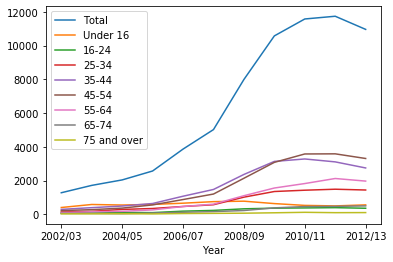

In [83]:
data_age.plot()

In [84]:
data_age.iloc[:2]

,Total,Under 16,16-24,25-34,35-44,45-54,55-64,65-74,75 and over
Year,,,,,,,,,
2002/03,1275.0,400.0,65.0,136.0,289.0,216.0,94.0,52.0,23.0
2003/04,1711.0,579.0,67.0,174.0,391.0,273.0,151.0,52.0,24.0


In [ ]:
apakah anak2 dari data ini semakin tahun cenderung semakin gemuk (16-24)

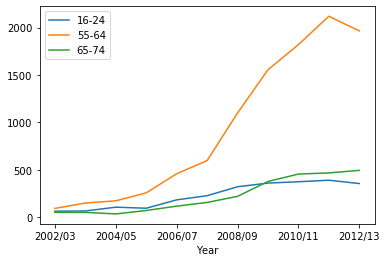

In [87]:
data_age["16-24"].plot(legend=True)
data_age["55-64"].plot(legend=True)
data_age["65-74"].plot(legend=True)

In [88]:
from datetime import datetime

In [89]:
date_rng = pd.date_range("2021/01/01", "2021/06/01", freq="D")

In [90]:
date_rng

DatetimeIndex(['2021-01-01', '2021-01-02', '2021-01-03', '2021-01-04',
               '2021-01-05', '2021-01-06', '2021-01-07', '2021-01-08',
               '2021-01-09', '2021-01-10',
               ...
               '2021-05-23', '2021-05-24', '2021-05-25', '2021-05-26',
               '2021-05-27', '2021-05-28', '2021-05-29', '2021-05-30',
               '2021-05-31', '2021-06-01'],
              dtype='datetime64[ns]', length=152, freq='D')

In [91]:
date_rng = pd.date_range("2021/01/01", "2021/06/01", freq="2D")

In [92]:
date_rng

DatetimeIndex(['2021-01-01', '2021-01-03', '2021-01-05', '2021-01-07',
               '2021-01-09', '2021-01-11', '2021-01-13', '2021-01-15',
               '2021-01-17', '2021-01-19', '2021-01-21', '2021-01-23',
               '2021-01-25', '2021-01-27', '2021-01-29', '2021-01-31',
               '2021-02-02', '2021-02-04', '2021-02-06', '2021-02-08',
               '2021-02-10', '2021-02-12', '2021-02-14', '2021-02-16',
               '2021-02-18', '2021-02-20', '2021-02-22', '2021-02-24',
               '2021-02-26', '2021-02-28', '2021-03-02', '2021-03-04',
               '2021-03-06', '2021-03-08', '2021-03-10', '2021-03-12',
               '2021-03-14', '2021-03-16', '2021-03-18', '2021-03-20',
               '2021-03-22', '2021-03-24', '2021-03-26', '2021-03-28',
               '2021-03-30', '2021-04-01', '2021-04-03', '2021-04-05',
               '2021-04-07', '2021-04-09', '2021-04-11', '2021-04-13',
               '2021-04-15', '2021-04-17', '2021-04-19', '2021-04-21',
      

In [94]:
daterange_hour = pd.date_range("2021/01/01", "2021/06/01", freq="H")
daterange_hour

DatetimeIndex(['2021-01-01 00:00:00', '2021-01-01 01:00:00',
               '2021-01-01 02:00:00', '2021-01-01 03:00:00',
               '2021-01-01 04:00:00', '2021-01-01 05:00:00',
               '2021-01-01 06:00:00', '2021-01-01 07:00:00',
               '2021-01-01 08:00:00', '2021-01-01 09:00:00',
               ...
               '2021-05-31 15:00:00', '2021-05-31 16:00:00',
               '2021-05-31 17:00:00', '2021-05-31 18:00:00',
               '2021-05-31 19:00:00', '2021-05-31 20:00:00',
               '2021-05-31 21:00:00', '2021-05-31 22:00:00',
               '2021-05-31 23:00:00', '2021-06-01 00:00:00'],
              dtype='datetime64[ns]', length=3625, freq='H')

In [ ]:
bikin dataframe isinya tanggal2 diatas

In [95]:
df = pd.DataFrame(daterange_hour, columns=["date"])

In [96]:
df

,date
0,2021-01-01 00:00:00
1,2021-01-01 01:00:00
2,2021-01-01 02:00:00
3,2021-01-01 03:00:00
4,2021-01-01 04:00:00
...,...
3620,2021-05-31 20:00:00
3621,2021-05-31 21:00:00
3622,2021-05-31 22:00:00
3623,2021-05-31 23:00:00


In [97]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3625 entries, 0 to 3624
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    3625 non-null   datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 28.4 KB


In [ ]:
tambah column data

In [98]:
df["data"] = np.random.randint(100, size=df.shape[0])
df

,date,data
0,2021-01-01 00:00:00,55
1,2021-01-01 01:00:00,53
2,2021-01-01 02:00:00,62
3,2021-01-01 03:00:00,78
4,2021-01-01 04:00:00,11
...,...,...
3620,2021-05-31 20:00:00,80
3621,2021-05-31 21:00:00,58
3622,2021-05-31 22:00:00,48
3623,2021-05-31 23:00:00,43


In [99]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3625 entries, 0 to 3624
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    3625 non-null   datetime64[ns]
 1   data    3625 non-null   int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 56.8 KB


In [100]:
df["datetime"] = df["date"]
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3625 entries, 0 to 3624
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   date      3625 non-null   datetime64[ns]
 1   data      3625 non-null   int64         
 2   datetime  3625 non-null   datetime64[ns]
dtypes: datetime64[ns](2), int64(1)
memory usage: 85.1 KB


In [101]:
df.set_index("date", inplace= True)

In [102]:
df

,data,datetime
date,,
2021-01-01 00:00:00,55,2021-01-01 00:00:00
2021-01-01 01:00:00,53,2021-01-01 01:00:00
2021-01-01 02:00:00,62,2021-01-01 02:00:00
2021-01-01 03:00:00,78,2021-01-01 03:00:00
2021-01-01 04:00:00,11,2021-01-01 04:00:00
...,...,...
2021-05-31 20:00:00,80,2021-05-31 20:00:00
2021-05-31 21:00:00,58,2021-05-31 21:00:00
2021-05-31 22:00:00,48,2021-05-31 22:00:00


In [104]:
df.index.day

Int64Index([ 1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
            ...
            31, 31, 31, 31, 31, 31, 31, 31, 31,  1],
           dtype='int64', name='date', length=3625)

In [105]:
df.index.hour

Int64Index([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9,
            ...
            15, 16, 17, 18, 19, 20, 21, 22, 23,  0],
           dtype='int64', name='date', length=3625)

In [106]:
df.index.week, df.index.day_name(), df["datetime"].dt.weekday

/srv/conda/envs/notebook/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: weekofyear and week have been deprecated, please use DatetimeIndex.isocalendar().week instead, which returns a Series.  To exactly reproduce the behavior of week and weekofyear and return an Index, you may call pd.Int64Index(idx.isocalendar().week)
  """Entry point for launching an IPython kernel.


(Int64Index([53, 53, 53, 53, 53, 53, 53, 53, 53, 53,
             ...
             22, 22, 22, 22, 22, 22, 22, 22, 22, 22],
            dtype='int64', name='date', length=3625),
 Index(['Friday', 'Friday', 'Friday', 'Friday', 'Friday', 'Friday', 'Friday',
        'Friday', 'Friday', 'Friday',
        ...
        'Monday', 'Monday', 'Monday', 'Monday', 'Monday', 'Monday', 'Monday',
        'Monday', 'Monday', 'Tuesday'],
       dtype='object', name='date', length=3625),
 date
 2021-01-01 00:00:00    4
 2021-01-01 01:00:00    4
 2021-01-01 02:00:00    4
 2021-01-01 03:00:00    4
 2021-01-01 04:00:00    4
                       ..
 2021-05-31 20:00:00    0
 2021-05-31 21:00:00    0
 2021-05-31 22:00:00    0
 2021-05-31 23:00:00    0
 2021-06-01 00:00:00    1
 Name: datetime, Length: 3625, dtype: int64)

In [107]:
df.index.day_of_year, df.index.day_name, df["datetime"].dt.quarter

(Int64Index([  1,   1,   1,   1,   1,   1,   1,   1,   1,   1,
             ...
             151, 151, 151, 151, 151, 151, 151, 151, 151, 152],
            dtype='int64', name='date', length=3625),
 <bound method inherit_from_data.<locals>.method of DatetimeIndex(['2021-01-01 00:00:00', '2021-01-01 01:00:00',
                '2021-01-01 02:00:00', '2021-01-01 03:00:00',
                '2021-01-01 04:00:00', '2021-01-01 05:00:00',
                '2021-01-01 06:00:00', '2021-01-01 07:00:00',
                '2021-01-01 08:00:00', '2021-01-01 09:00:00',
                ...
                '2021-05-31 15:00:00', '2021-05-31 16:00:00',
                '2021-05-31 17:00:00', '2021-05-31 18:00:00',
                '2021-05-31 19:00:00', '2021-05-31 20:00:00',
                '2021-05-31 21:00:00', '2021-05-31 22:00:00',
                '2021-05-31 23:00:00', '2021-06-01 00:00:00'],
               dtype='datetime64[ns]', name='date', length=3625, freq=None)>,
 date
 2021-01-01 00:00:00    1


In [108]:
df[df.index.hour ==8]

,data,datetime
date,,
2021-01-01 08:00:00,35,2021-01-01 08:00:00
2021-01-02 08:00:00,25,2021-01-02 08:00:00
2021-01-03 08:00:00,60,2021-01-03 08:00:00
2021-01-04 08:00:00,60,2021-01-04 08:00:00
2021-01-05 08:00:00,93,2021-01-05 08:00:00
...,...,...
2021-05-27 08:00:00,68,2021-05-27 08:00:00
2021-05-28 08:00:00,92,2021-05-28 08:00:00
2021-05-29 08:00:00,19,2021-05-29 08:00:00


In [109]:
df[(df.index.hour<=12) &(df.index.hour >=6)]

,data,datetime
date,,
2021-01-01 06:00:00,48,2021-01-01 06:00:00
2021-01-01 07:00:00,92,2021-01-01 07:00:00
2021-01-01 08:00:00,35,2021-01-01 08:00:00
2021-01-01 09:00:00,72,2021-01-01 09:00:00
2021-01-01 10:00:00,81,2021-01-01 10:00:00
...,...,...
2021-05-31 08:00:00,29,2021-05-31 08:00:00
2021-05-31 09:00:00,12,2021-05-31 09:00:00
2021-05-31 10:00:00,55,2021-05-31 10:00:00


In [110]:
df.loc["2021-01-01":"2021-01-01 12"]

,data,datetime
date,,
2021-01-01 00:00:00,55,2021-01-01 00:00:00
2021-01-01 01:00:00,53,2021-01-01 01:00:00
2021-01-01 02:00:00,62,2021-01-01 02:00:00
2021-01-01 03:00:00,78,2021-01-01 03:00:00
2021-01-01 04:00:00,11,2021-01-01 04:00:00
2021-01-01 05:00:00,96,2021-01-01 05:00:00
2021-01-01 06:00:00,48,2021-01-01 06:00:00
2021-01-01 07:00:00,92,2021-01-01 07:00:00
2021-01-01 08:00:00,35,2021-01-01 08:00:00


In [111]:
df[df.index.is_month_end]

,data,datetime
date,,
2021-01-31 00:00:00,38,2021-01-31 00:00:00
2021-01-31 01:00:00,12,2021-01-31 01:00:00
2021-01-31 02:00:00,17,2021-01-31 02:00:00
2021-01-31 03:00:00,73,2021-01-31 03:00:00
2021-01-31 04:00:00,60,2021-01-31 04:00:00
...,...,...
2021-05-31 19:00:00,9,2021-05-31 19:00:00
2021-05-31 20:00:00,80,2021-05-31 20:00:00
2021-05-31 21:00:00,58,2021-05-31 21:00:00


In [ ]:
coba weekly

In [113]:
df.resample("W").sum()

,data
date,
2021-01-03,3413
2021-01-10,8610
2021-01-17,8629
2021-01-24,7668
2021-01-31,7518
2021-02-07,7536
2021-02-14,8560
2021-02-21,8248
2021-02-28,8471


In [114]:
df.loc["2021-1-1":"2021-1-3", "data"].sum()

3413

In [115]:
df.resample("2W").sum()

,data
date,
2021-01-03,3413
2021-01-17,17239
2021-01-31,15186
2021-02-14,16096
2021-02-28,16719
2021-03-14,16264
2021-03-28,16258
2021-04-11,16048
2021-04-25,16725


In [ ]:
jumlah dari 3 baris pertama pake function rolling(3)

In [116]:
daily_average = df.resample("D").mean()
biweekly_average = df.resample("2W").mean()
monthly_total=df.resample("M").sum()

display(daily_average.head())
display(biweekly_average.head())
display(monthly_total.head())

,data
date,
2021-01-01,53.166667
2021-01-02,56.958333
2021-01-03,32.083333
2021-01-04,43.250000
2021-01-05,54.791667


,data
date,
2021-01-03,47.402778
2021-01-17,51.306548
2021-01-31,45.196429
2021-02-14,47.904762
2021-02-28,49.758929


,data
date,
2021-01-31,35838
2021-02-28,32815
2021-03-31,36093
2021-04-30,34706
2021-05-31,37618


In [117]:
daily_average.rolling(5)

Rolling [window=5,center=False,axis=0]

In [ ]:
rata2 5 harian

In [118]:
daily_average.rolling(5).mean()

,data
date,
2021-01-01,NaN
2021-01-02,NaN
2021-01-03,NaN
2021-01-04,NaN
2021-01-05,48.050000
...,...
2021-05-28,48.808333
2021-05-29,48.300000
2021-05-30,50.491667


In [119]:
daily_average.rolling("5D").mean()

,data
date,
2021-01-01,53.166667
2021-01-02,55.062500
2021-01-03,47.402778
2021-01-04,46.364583
2021-01-05,48.050000
...,...
2021-05-28,48.808333
2021-05-29,48.300000
2021-05-30,50.491667


In [120]:
daily_average.rolling(5).mean().fillna(method="backfill") #isi dari depan ke belakang, kalo sebelumnya nan

,data
date,
2021-01-01,48.050000
2021-01-02,48.050000
2021-01-03,48.050000
2021-01-04,48.050000
2021-01-05,48.050000
...,...
2021-05-28,48.808333
2021-05-29,48.300000
2021-05-30,50.491667


In [159]:
opsd_daily =pd.read_csv('https://raw.githubusercontent.com/ardhiraka/PFDS_sources/master/opsd_germany_daily.csv')
opsd_daily.shape

(4383, 5)

In [154]:
opsd_daily.head(3)

,Date,Consumption,Wind,Solar,Wind+Solar
0,2006-01-01,1069.184,NaN,NaN,NaN
1,2006-01-02,1380.521,NaN,NaN,NaN
2,2006-01-03,1442.533,NaN,NaN,NaN


In [155]:
opsd_daily.shape

(4383, 5)

In [160]:
opsd_daily.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4383 entries, 0 to 4382
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Date         4383 non-null   object 
 1   Consumption  4383 non-null   float64
 2   Wind         2920 non-null   float64
 3   Solar        2188 non-null   float64
 4   Wind+Solar   2187 non-null   float64
dtypes: float64(4), object(1)
memory usage: 171.3+ KB


In [ ]:
convert string to datetime

In [158]:
opsd_daily = opsd_daily.set_index('Date')
opsd_daily.info()

KeyError: "None of ['Date'] are in the columns"

In [163]:
opsd_daily["Date"].value_counts()
pd.value_counts(opsd_daily.values.flatten())

31.469      2
14.973      2
31.867      2
82.594      2
187.626     2
           ..
1439.710    1
156.158     1
33.321      1
32.562      1
523.327     1
Length: 16023, dtype: int64

In [165]:
opsd_daily['Date']=pd.to_datetime(opsd_daily['Date'])
opsd_daily.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4383 entries, 0 to 4382
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Date         4383 non-null   datetime64[ns]
 1   Consumption  4383 non-null   float64       
 2   Wind         2920 non-null   float64       
 3   Solar        2188 non-null   float64       
 4   Wind+Solar   2187 non-null   float64       
dtypes: datetime64[ns](1), float64(4)
memory usage: 171.3 KB


In [166]:
opsd_daily.set_index("Date", inplace=True)
opsd_daily.head(10)

,Consumption,Wind,Solar,Wind+Solar
Date,,,,
2006-01-01,1069.184,NaN,NaN,NaN
2006-01-02,1380.521,NaN,NaN,NaN
2006-01-03,1442.533,NaN,NaN,NaN
2006-01-04,1457.217,NaN,NaN,NaN
2006-01-05,1477.131,NaN,NaN,NaN
2006-01-06,1403.427,NaN,NaN,NaN
2006-01-07,1300.287,NaN,NaN,NaN
2006-01-08,1207.985,NaN,NaN,NaN
2006-01-09,1529.323,NaN,NaN,NaN


In [167]:
opsd_daily.index.year.unique(), df.index.year.value_counts()

(Int64Index([2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016,
             2017],
            dtype='int64', name='Date'),
 2021    3625
 Name: date, dtype: int64)

In [170]:
opsd_daily["Year"]= opsd_daily.index.year
opsd_daily["Month"]= opsd_daily.index.month
opsd_daily["Weekday"]= opsd_daily.index.weekday

In [171]:
opsd_daily

,Consumption,Wind,Solar,Wind+Solar,Year,Month,Weekday
Date,,,,,,,
2006-01-01,1069.18400,NaN,NaN,NaN,2006,1,6
2006-01-02,1380.52100,NaN,NaN,NaN,2006,1,0
2006-01-03,1442.53300,NaN,NaN,NaN,2006,1,1
2006-01-04,1457.21700,NaN,NaN,NaN,2006,1,2
2006-01-05,1477.13100,NaN,NaN,NaN,2006,1,3
...,...,...,...,...,...,...,...
2017-12-27,1263.94091,394.507,16.530,411.037,2017,12,2
2017-12-28,1299.86398,506.424,14.162,520.586,2017,12,3
2017-12-29,1295.08753,584.277,29.854,614.131,2017,12,4


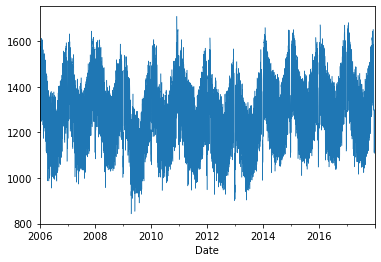

In [172]:
opsd_daily['Consumption'].plot(linewidth=0.5);